In [47]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


VECTORIZATION

In [48]:
import numpy as np
x_train_vec = x_train.reshape(60000, 784)
x_test_vec = x_test.reshape(10000, 784)
print("Shape of x_train is: ", x_train_vec.shape)
print("Shape of x_test is: ", x_test_vec.shape)

Shape of x_train is:  (60000, 784)
Shape of x_test is:  (10000, 784)


ONE HOT ENCODING

In [49]:
def to_one_hot(labels, dimension = 10):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print("Shape of y_train_vec is", y_train_vec.shape)


Shape of y_train_vec is (60000, 10)


In [50]:
rand_indeces = np.random.permutation(60000)
train_indeces = rand_indeces[:50000]
val_indeces = rand_indeces[50000:]

x_valid_vec = x_train_vec[val_indeces]
y_valid_vec = y_train_vec[val_indeces]

x_train_vec = x_train_vec[train_indeces]
y_train_vec = y_train_vec[train_indeces]

print("Shape of x_valid_vec is", x_valid_vec.shape)
print("Shape of y_valid_vec is", y_valid_vec.shape)

Shape of x_valid_vec is (10000, 784)
Shape of y_valid_vec is (10000, 10)


BUILDING SOFTMAX CLASSIFIER MODEL

In [51]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10 , activation='softmax', input_shape = (784,) ))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Specify the optimization algorithm, learning rate(LR), loss function, and metric.

In [52]:
from keras import optimizers
model.compile(optimizers.RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Train model

In [53]:
history = model.fit(x_train_vec,y_train_vec, epochs=50, batch_size=128,validation_data=(x_valid_vec,y_valid_vec))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3585 - loss: 70.4464 - val_accuracy: 0.7313 - val_loss: 16.3680
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7638 - loss: 13.4869 - val_accuracy: 0.8076 - val_loss: 10.6811
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8259 - loss: 9.2286 - val_accuracy: 0.8317 - val_loss: 8.7285
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8472 - loss: 7.5029 - val_accuracy: 0.8442 - val_loss: 7.6193
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8595 - loss: 6.3053 - val_accuracy: 0.8514 - val_loss: 6.9510
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8681 - loss: 5.5720 - val_accuracy: 0.8568 - val_loss: 6.4718
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8724 - loss: 5.1601 - val_accuracy: 0.8606 - val_loss: 6.0556
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8812 - loss: 4.5934 - val_accuracy

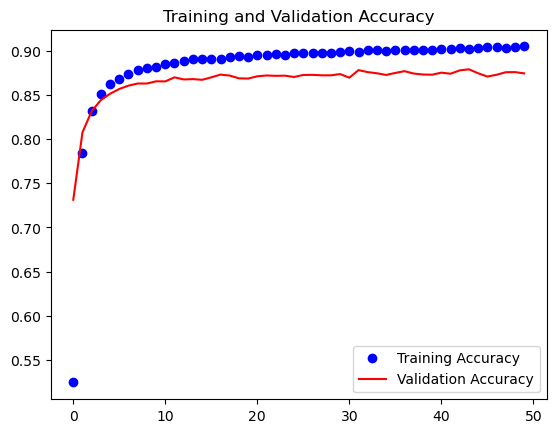

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

EVALUATE

In [55]:
loss_and_accuracy = model.evaluate(x_test_vec, y_test_vec)
loss_and_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8790 - loss: 1.9524


[1.8061943054199219, 0.8909000158309937]